In [254]:
import pandas as pd
import numpy as np
import math  

df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 53, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54,46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

In [255]:
df.shape
print(df['x'][1])

20


In [266]:
k=3
c_x=[]
c_y=[]
dist_c=[]
for i in range(0,k):
    c_x.append(df['x'][i])
    c_y.append(df['y'][i])
    dist_c.append(0)


In [267]:
c_x,c_y

([12, 20, 28], [39, 36, 30])

In [268]:

dist_c1=0
dist_c2=0
clust=[]
temp=0
for i in range(0,df.shape[0]):
    for j in range(0,k):
        dist_c[j]=math.sqrt((c_x[j]-df['x'][i])**2+(c_y[j]-df['y'][i])**2)
    temp=min(dist_c)
    for j in range(0,k):
        if(temp==dist_c[j]):
            clust.append(j)


In [269]:
print(clust)
print(df)

[0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
     x   y
0   12  39
1   20  36
2   28  30
3   18  52
4   29  54
5   33  46
6   24  55
7   45  59
8   45  63
9   52  70
10  51  66
11  52  63
12  55  58
13  53  23
14  55  14
15  61   8
16  64  19
17  69   7
18  72  24


In [270]:
print(clust,k)

def cal_median(clust):
    c_x_n=[]
    c_y_n=[]
    for j in range(0,k):
        mean_x=0
        mean_y=0
        count=0
        for i in range(0,len(clust)):
            if(clust[i]==j):
                mean_x=mean_x+df['x'][i]
                mean_y=mean_y+df['y'][i]
                count=count+1
        print('cluster:',count)
        mean_x=mean_x/count
        mean_y=mean_y/count
        c_x_n.append(mean_x)
        c_y_n.append(mean_y)
    return c_x_n,c_y_n

print(c_x_n,c_y_n)


[0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2] 3
[23.428571428571427, 50.0, 62.333333333333336] [44.57142857142857, 63.166666666666664, 15.833333333333334]


In [271]:
def update_cluster(clust,c_x_n,c_y_n):
    for i in range(0,df.shape[0]):
        for j in range(0,k):
            dist_c[j]=math.sqrt((c_x_n[j]-df['x'][i])**2+(c_y_n[j]-df['y'][i])**2)
        #print(dist_c,min(dist_c))
        temp=min(dist_c)
        for j in range(0,k):
            if(temp==dist_c[j]):
                clust.append(j)
    return clust


In [272]:
old_clust=clust
new_clust=[]
while old_clust!=new_clust:
    c_x_n,c_y_n=cal_median(clust)
    print(clust)
    old_clust=clust
    clust=[]
    clust=update_cluster(clust,c_x_n,c_y_n)
    new_clust=clust


cluster: 2
cluster: 5
cluster: 12
[0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
cluster: 4
cluster: 8
cluster: 7
[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2]
cluster: 6
cluster: 7
cluster: 6
[0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]
cluster: 7
cluster: 6
cluster: 6
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2]


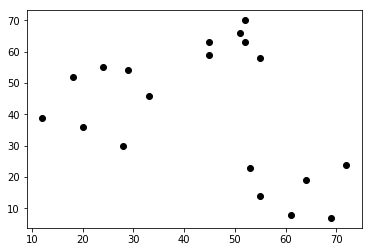

In [273]:
print(clust)
plt.scatter(df['x'], df['y'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}